In [12]:
# ! C:\Users\Ricky\AppData\Local\Programs\Python\Python39\python.exe -m pip install statsmodels

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew, kurtosis, probplot
from scipy.stats import zscore

# INPUT FILE NAME

In [14]:
sim_name = "17"

# Aggregate All Runs Into One File

In [15]:
# # directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/Last_3000/"
# # output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Data Generated/Last_3000_Summary_with_STD.csv"
# # df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/{sim_name}.csv")

# directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000\\"
# output_path = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000_Summary_with_STD.csv"
# df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\{sim_name}.csv")

# column_names = [
#     'Trade Number', 'Market Price', 'Excess Demand', 'Speculator Proportion',
#     'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades',
#     'MP Volatility Last 10 Trades', 'Pre-CUSP Market Price Difference', 
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# # df = df[df['Catastrophe Point Found?'] == True]
# valid_runs = df['Run Number']

# averaged_data = []
# std_dev_data = []

# for row_index in range(3000):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))

#     row_average = np.nanmean(row_values, axis=0)
#     row_std_dev = np.nanstd(row_values, axis=0) 

#     averaged_data.append(row_average)
#     std_dev_data.append(row_std_dev)

# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# std_dev_df = pd.DataFrame(std_dev_data, columns=[f"{col} STDV" for col in column_names])

# combined_df = pd.concat([averaged_df, std_dev_df], axis=1)

# # Save the combined DataFrame to CSV
# combined_df.to_csv(output_path, index=False)
# print(f"Averaged window data saved to {output_path}")

# Load New Aggregated Data

In [16]:
# directory = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Last_3000_Summary_with_STD.csv"

directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Last_3000_Summary_with_STD.csv"

df = pd.read_csv(directory)
df
#Replace Trade Number so it starts from 1 not 10000
df['Trade Number'] = range(1, len(df) + 1)

# Figure 43 Correlation Matrix

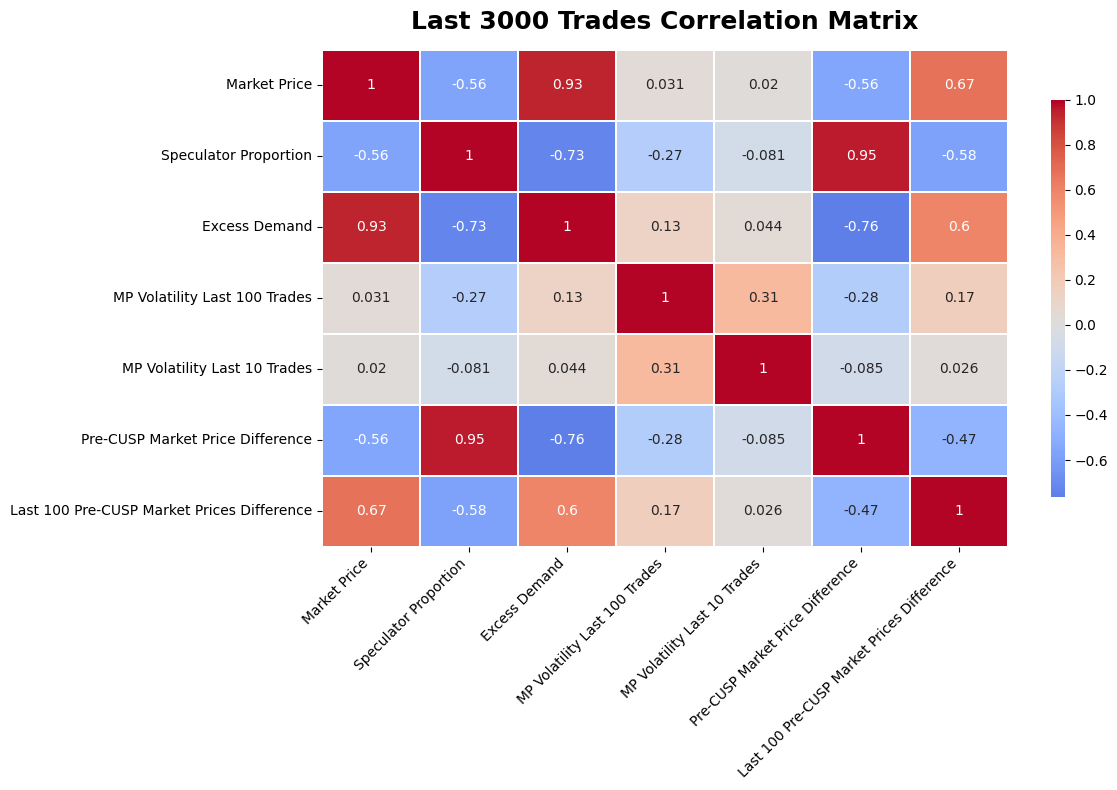

In [17]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Speculator Proportion', 'Excess Demand', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()
corr_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  
    annot_kws={"size": 10}, 
)
plt.title('Last 3000 Trades Correlation Matrix', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

# Figure 44 Markets Price in Last 3000 Trades Pre-Crash

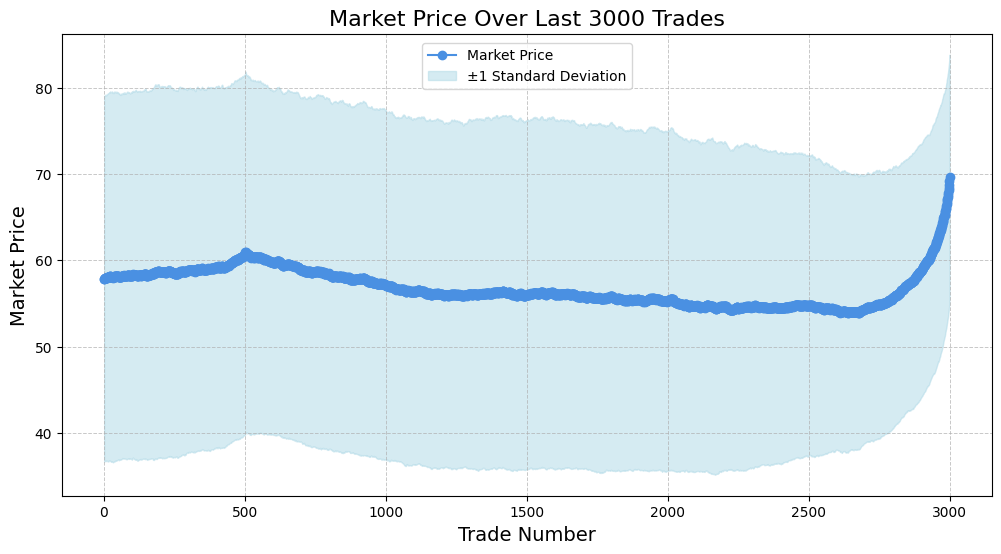

In [18]:
trade_number = df['Trade Number']
market_price = df['Market Price']
market_price_std = df['Market Price STDV']

upper_bound = market_price + market_price_std
lower_bound = market_price - market_price_std

plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, market_price, 
    marker='o', linestyle='-', color='#4A90E2', label='Market Price'
)

plt.fill_between(trade_number, lower_bound, upper_bound, color='lightblue', alpha=0.5, label='±1 Standard Deviation')

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.title('Market Price Over Last 3000 Trades', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=1, borderaxespad=0.)
plt.show()


# Figure 45

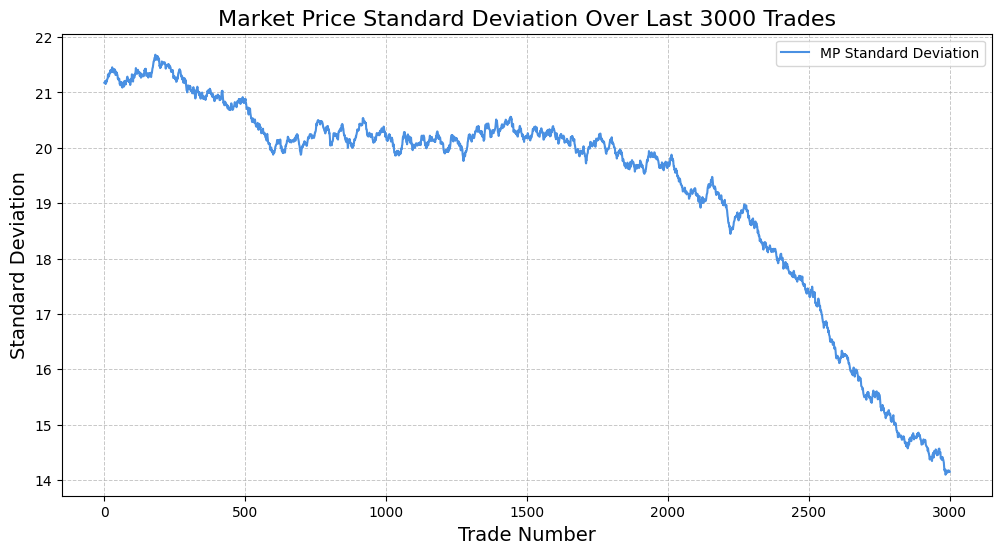

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, market_price_std, 
    linestyle='-', color='#4A90E2', label='MP Standard Deviation'
)

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Market Price Standard Deviation Over Last 3000 Trades', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

# Figure 45 Stats

In [20]:
std_dev_1 = df.loc[0, 'Market Price STDV']
std_dev_2 = df.loc[1999, 'Market Price STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
print(percentage_change)

std_dev_1 = df.loc[1999, 'Market Price STDV']
std_dev_2 = df.loc[2999, 'Market Price STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
print(percentage_change)

-7.521013649262813
-39.17352895496633


# Figure 46: Excess Demand In Last 3000 trades pre catastrophe

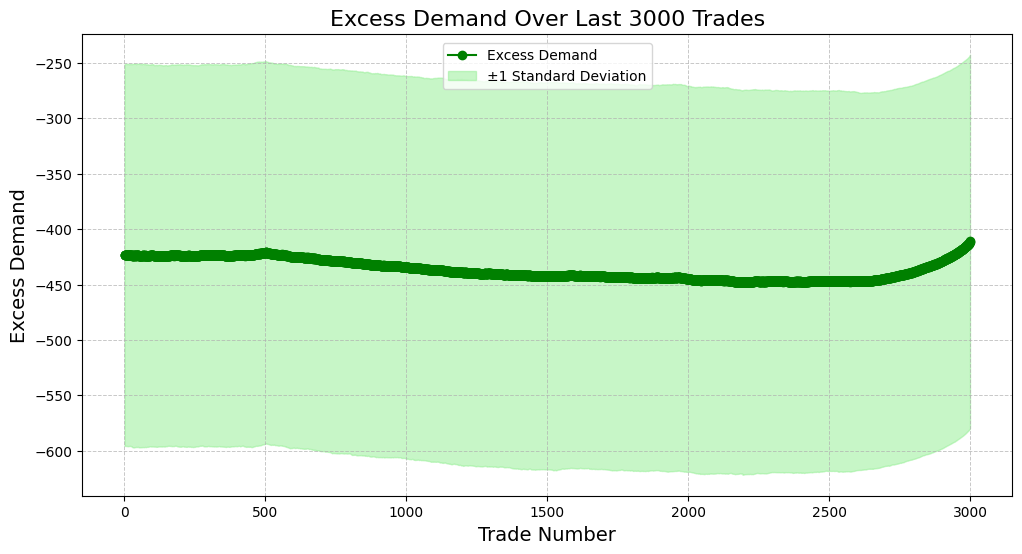

In [21]:
trade_number = df['Trade Number']
excess_demand = df['Excess Demand']
excess_demand_std = df['Excess Demand STDV']

upper_bound = excess_demand + excess_demand_std
lower_bound = excess_demand - excess_demand_std

plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, excess_demand, 
    marker='o', linestyle='-', color='g', label='Excess Demand'  
)

plt.fill_between(trade_number, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label='±1 Standard Deviation')

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Excess Demand', fontsize=14)
plt.title('Excess Demand Over Last 3000 Trades', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=1, borderaxespad=0.)
plt.show()


# Figure 47: Excess Demand Standard Deviation Over Last 3000 Trades

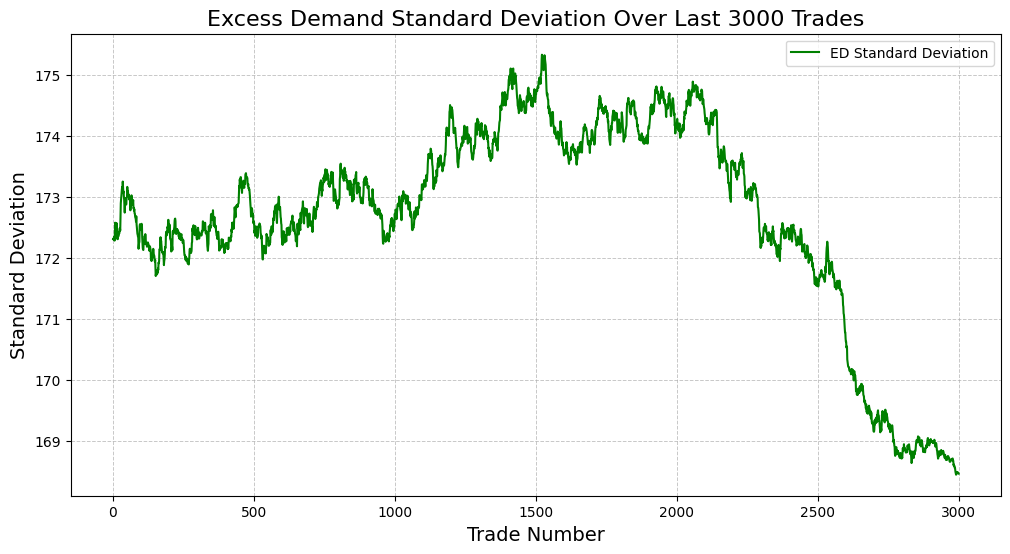

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(
    trade_number, excess_demand_std, 
    linestyle='-', color='g', label='ED Standard Deviation'  
)

plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.title('Excess Demand Standard Deviation Over Last 3000 Trades', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


# Figure 47 Stats

In [23]:
std_dev_1 = df.loc[0, 'Excess Demand STDV']
std_dev_2 = df.loc[1999, 'Excess Demand STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
print(percentage_change)

std_dev_1 = df.loc[1999, 'Excess Demand STDV']
std_dev_2 = df.loc[2999, 'Excess Demand STDV']

percentage_change = ((std_dev_2 - std_dev_1) / std_dev_2) * 100 if std_dev_1 != 0 else None
print(percentage_change)

val_1 = df['Excess Demand STDV'].max()
val_2 = df['Excess Demand STDV'].min()
print(val_1)
print(val_2)


1.0724072014511443
-3.386000364279429
175.3238534849072
168.4545799548247


# Figure 48 Determining Volatilty Values; Last 10, Last 100

In [24]:
df_1 = df.copy()
df_1['Returns'] = df_1['Market Price'].pct_change()

df_1['Volatility'] = df_1['Returns'].rolling(window=2).std() 
df_1['Volatility_10'] = df_1['Returns'].rolling(window=10).std()  
df_1['Volatility_100'] = df_1['Returns'].rolling(window=100).std() 

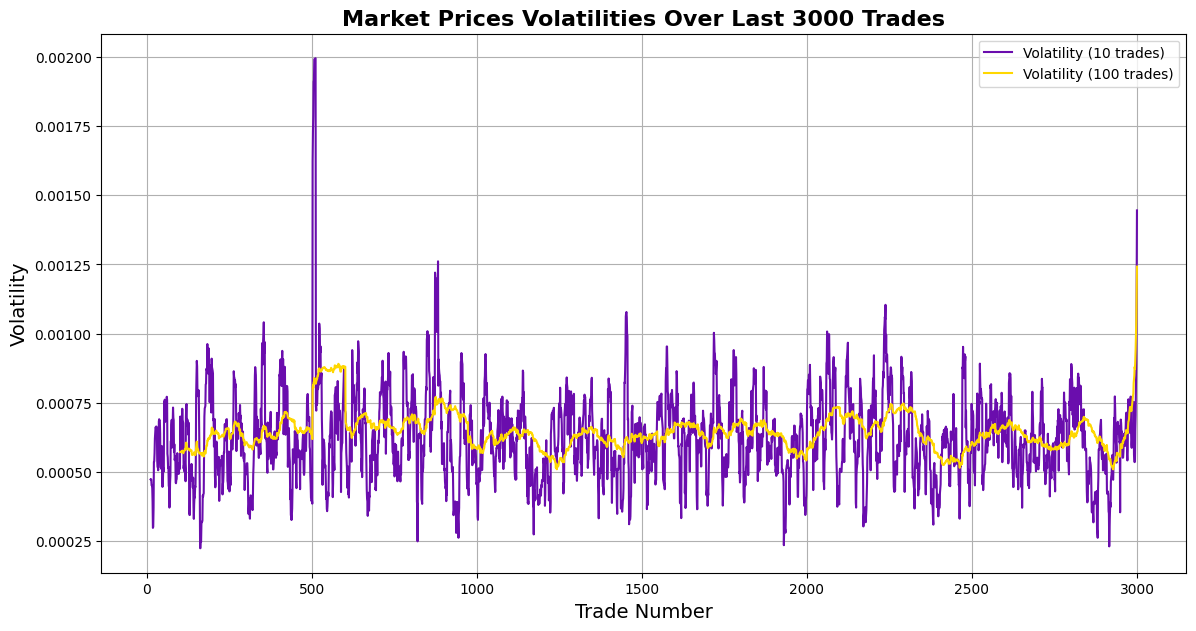

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df_1['Trade Number'], df_1['Volatility_10'], label='Volatility (10 trades)', color='#6A0DAD')  
plt.plot(df_1['Trade Number'], df_1['Volatility_100'], label='Volatility (100 trades)', color='#FFD700')  

plt.title('Market Prices Volatilities Over Last 3000 Trades', fontsize=16, weight='bold')
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid()
plt.show()


# Figure 49: Normalised MP, ED, Volatility

/var/folders/pl/z_ffm_9d6d9fz_3thm5rvnj00000gn/T/ipykernel_83212/4045990851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_500[['Volatility_10', 'Excess Demand', 'Market Price']] = scaler.fit_transform(


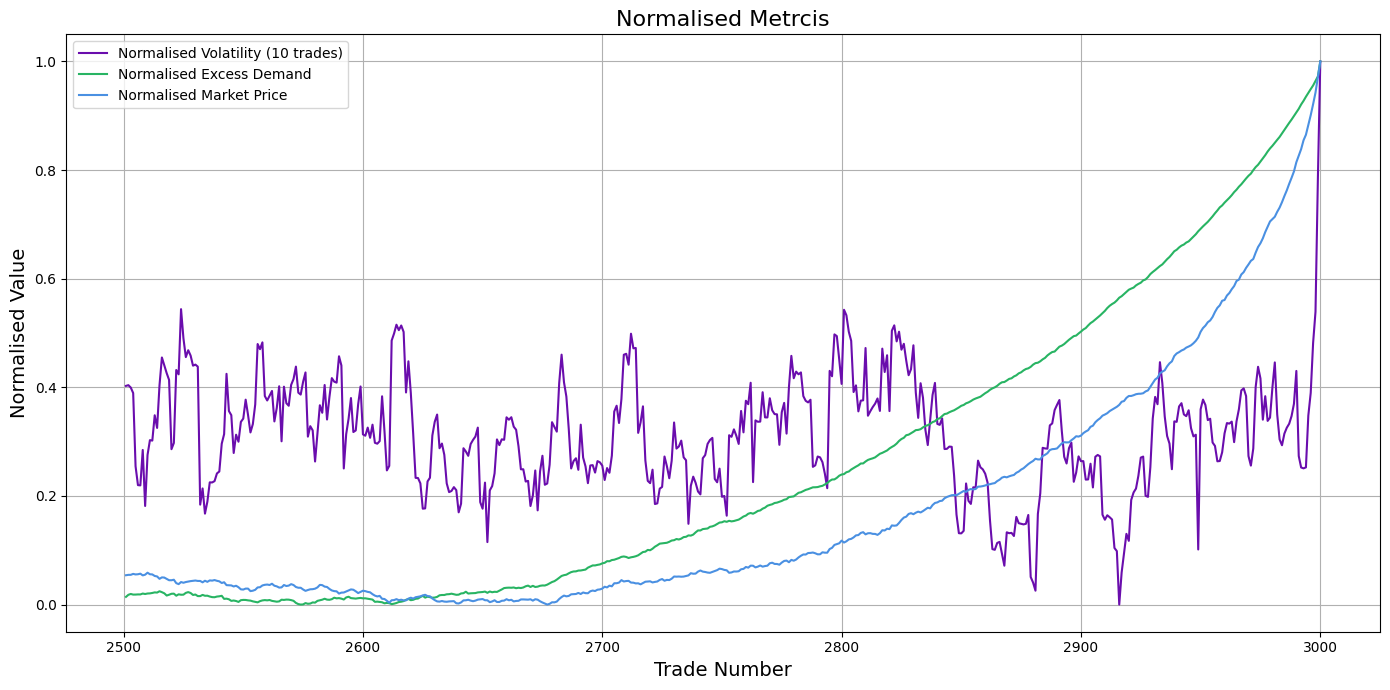

In [26]:
df_last_500 = df_1[2500:3000]

scaler = MinMaxScaler()
df_last_500[['Volatility_10', 'Excess Demand', 'Market Price']] = scaler.fit_transform(
    df_last_500[['Volatility_10', 'Excess Demand', 'Market Price']]
)

plt.figure(figsize=(14, 7))
plt.plot(df_last_500['Trade Number'], df_last_500['Volatility_10'], 
         label='Normalised Volatility (10 trades)', color='#6A0DAD')
plt.plot(df_last_500['Trade Number'], df_last_500['Excess Demand'], 
         label='Normalised Excess Demand', color='#28B463')
plt.plot(df_last_500['Trade Number'], df_last_500['Market Price'], 
         label='Normalised Market Price', color='#4A90E2')

plt.title('Normalised Metrcis', fontsize=16)
plt.xlabel('Trade Number', fontsize=14)
plt.ylabel('Normalised Value', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

# Figure 50: Z-Score

In [27]:
N = len(df_last_500)  
collapse_trade_count = len(df_1)  

df_last_500['Z_Scores'] = zscore(df_last_500['Volatility'])
print("Last 500 Trades Analysis:")
for i in range(N):
    trade_number = collapse_trade_count - (N - i)  
    price = df_last_500['Market Price'].iloc[i]
    volatility = df_last_500['Volatility'].iloc[i]
    z_score = df_last_500['Z_Scores'].iloc[i]

    print(f"Trade {trade_number}: Price = {price:.4f}, Volatility = {volatility:.4f}, Z-Score = {z_score:.4f}")

collapse_threshold = 0.05 
initial_price = df_last_500['Market Price'].iloc[0]  

collapse_signal_detected = False
for i in range(N):
    current_price = df_last_500['Market Price'].iloc[i]
    if current_price <= initial_price * (1 - collapse_threshold):
        collapse_signal_detected = True
        trade_number = collapse_trade_count - (N - i)
        print(f"Potential collapse signal detected at trade {trade_number} with a price of {current_price:.4f}.")
        break
if not collapse_signal_detected:
    print("No collapse signal detected in the last trades leading to the final collapse.")


Last 500 Trades Analysis:
Trade 2500: Price = 0.0540, Volatility = 0.0003, Z-Score = -0.4370
Trade 2501: Price = 0.0547, Volatility = 0.0006, Z-Score = 0.1924
Trade 2502: Price = 0.0548, Volatility = 0.0001, Z-Score = -1.0240
Trade 2503: Price = 0.0565, Volatility = 0.0003, Z-Score = -0.4500
Trade 2504: Price = 0.0555, Volatility = 0.0006, Z-Score = 0.1487
Trade 2505: Price = 0.0558, Volatility = 0.0003, Z-Score = -0.6334
Trade 2506: Price = 0.0569, Volatility = 0.0002, Z-Score = -0.9575
Trade 2507: Price = 0.0537, Volatility = 0.0009, Z-Score = 1.0536
Trade 2508: Price = 0.0550, Volatility = 0.0009, Z-Score = 1.1857
Trade 2509: Price = 0.0587, Volatility = 0.0005, Z-Score = -0.0861
Trade 2510: Price = 0.0558, Volatility = 0.0013, Z-Score = 2.2985
Trade 2511: Price = 0.0555, Volatility = 0.0005, Z-Score = 0.0575
Trade 2512: Price = 0.0527, Volatility = 0.0005, Z-Score = 0.0437
Trade 2513: Price = 0.0518, Volatility = 0.0004, Z-Score = -0.2790
Trade 2514: Price = 0.0474, Volatility = 0.

/var/folders/pl/z_ffm_9d6d9fz_3thm5rvnj00000gn/T/ipykernel_83212/442095872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_500['Z_Scores'] = zscore(df_last_500['Volatility'])


/var/folders/pl/z_ffm_9d6d9fz_3thm5rvnj00000gn/T/ipykernel_83212/3131852702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_500['Z_Scores'] = zscore(df_last_500['Volatility'])


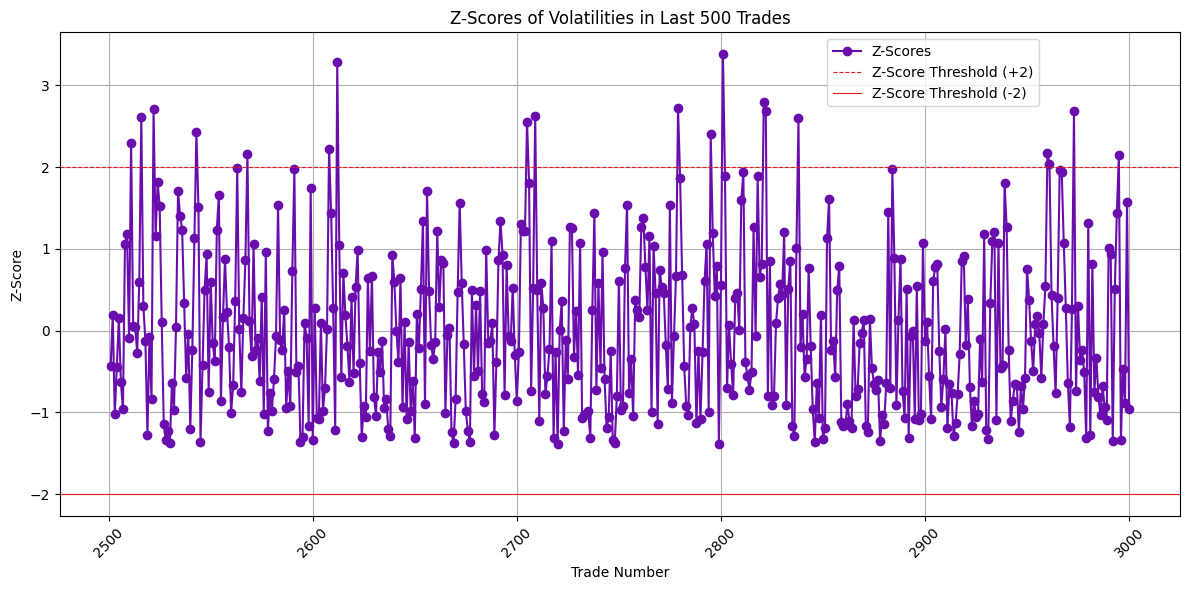

In [28]:
df_last_500['Z_Scores'] = zscore(df_last_500['Volatility'])
df_z_scores = pd.DataFrame(df_last_500)

plt.figure(figsize=(12, 6))
plt.plot(df_z_scores["Trade Number"], df_z_scores["Z_Scores"], marker='o', linestyle='-', color='#6A0DAD', label='Z-Scores')
plt.axhline(2, color='#E41A1C', linewidth=0.8, linestyle='--', label='Z-Score Threshold (+2)')
plt.axhline(-2, color='#E41A1C', linewidth=0.8, linestyle='-', label='Z-Score Threshold (-2)')
plt.title('Z-Scores of Volatilities in Last 500 Trades')
plt.xlabel('Trade Number')
plt.ylabel('Z-Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(0.88, 1)) 
plt.grid()
plt.tight_layout()

plt.show()

# Figure 51: Skewness and Autocorrelation

/var/folders/pl/z_ffm_9d6d9fz_3thm5rvnj00000gn/T/ipykernel_83212/2935117652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_1000['Log_Returns'] = np.log(df_last_1000['Market Price']).diff()


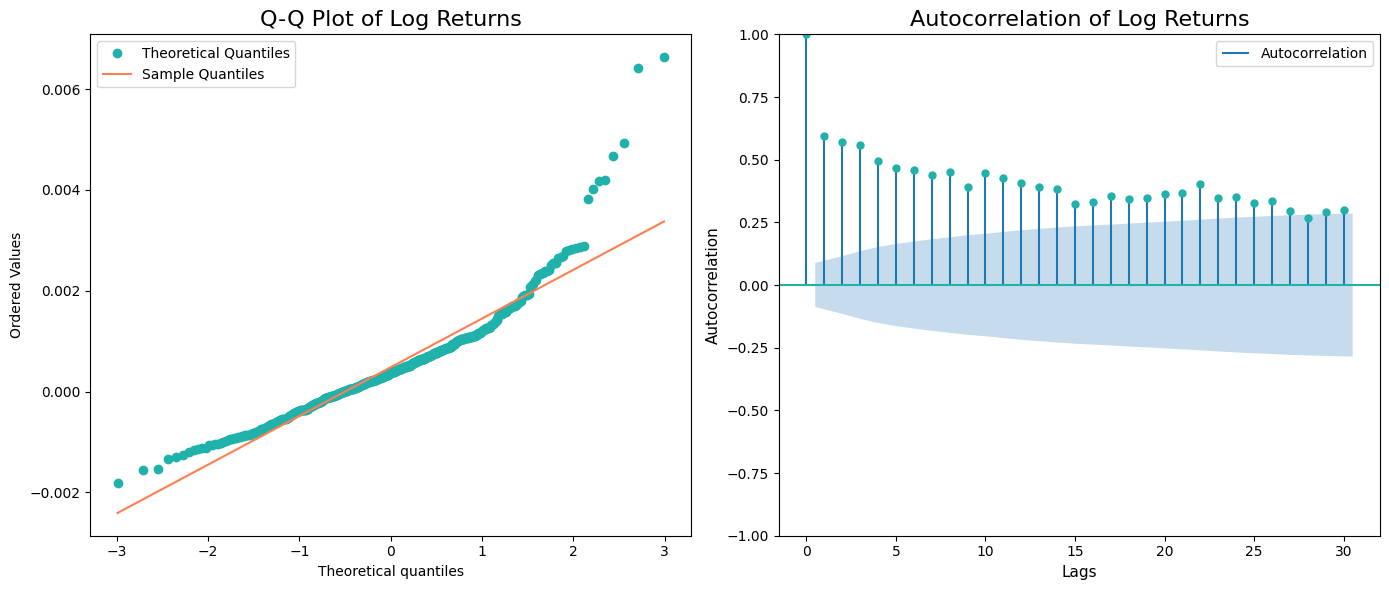

In [29]:
df_last_1000 = df_1.tail(500)  
df_last_1000['Log_Returns'] = np.log(df_last_1000['Market Price']).diff()

df_last_1000 = df_last_1000[df_last_1000['Log_Returns'].notna()]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
probplot(df_last_1000['Log_Returns'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns', fontsize=16)

qq_line = plt.gca().get_lines()[1]  
qq_dots = plt.gca().get_lines()[0]  
qq_line.set_color('#FF7F50')  
qq_dots.set_markerfacecolor('#20B2AA')  
qq_dots.set_markeredgecolor('#20B2AA')  #
plt.legend(['Theoretical Quantiles', 'Sample Quantiles'], loc='upper left', fontsize=10)

plt.subplot(1, 2, 2)
plot_acf(df_last_1000['Log_Returns'], lags=30, ax=plt.gca(), color='#20B2AA')  
plt.title('Autocorrelation of Log Returns', fontsize=16)
plt.xlabel('Lags', fontsize=11)  
plt.ylabel('Autocorrelation', fontsize=11) 

plt.legend(['Autocorrelation'], loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()
